In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import time
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
colorMap = sns.light_palette("blue", as_cmap=True)
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('qt4agg')
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
import warnings
warnings.filterwarnings('ignore')
import os
from IPython.display import Image
import gc  
root = '../data'
dirs= os.listdir(root)
dirs

['.DS_Store', 'submit.csv', 'test.csv', 'train.csv']

In [3]:
import pandas as pd
train = pd.read_csv(root+'/train.csv')
test = pd.read_csv(root+'/test.csv')
submit = pd.read_csv(root+'/submit.csv')

# train['CSNY'] = train['CSNY'].apply(convert)
# test['CSNY'] = test['CSNY'].apply(convert)

In [4]:
col_dict = {
    'id': '主键',
    'XINGBIE': '性别',
    'CSNY': '出生年月',
    'HYZK': '婚姻状况',
    'ZHIYE': '职业',
    'ZHICHEN': '职称',
    'ZHIWU': '职务',
    'XUELI': '学历',
    'DWJJLX': '单位经济类型',
    'DWSSHY': '单位所属行业',
    'GRJCJS': '个人缴存基数',
    'GRZHZT': '个人账户状态',
    'GRZHYE': '个人账户余额',
    'GRZHSNJZYE': '个人账户上年结转余额',
    'GRZHDNGJYE': '个人账户当年归集余额', 
    'GRYJCE': '个人月缴存额',
    'DWYJCE': '单位月缴存额',
    'DKFFE': '贷款发放额',
    'DKYE': '贷款余额',
    'DKLL': '贷款利率',
    'label': '是否逾期'
}

In [5]:
train.columns=train.columns.map(col_dict)
test.columns=test.columns.map(col_dict)

In [6]:
train.head()

,主键,性别,出生年月,婚姻状况,职业,职称,职务,学历,单位经济类型,单位所属行业,个人缴存基数,个人账户状态,个人账户余额,个人账户上年结转余额,个人账户当年归集余额,个人月缴存额,单位月缴存额,贷款发放额,贷款余额,贷款利率,是否逾期
0,train_0,1,1038672000,90,90,999,0,99,150,12,1737.0,1,3223.515,801.310,837.000,312.00,312.00,175237,154112.935,2.708,0
1,train_1,2,504892800,90,90,999,0,99,110,0,4894.0,1,18055.195,53213.220,1065.200,795.84,795.84,300237,298252.945,2.979,0
2,train_2,1,736185600,90,90,999,0,99,150,9,10297.0,1,27426.600,13963.140,7230.020,1444.20,1444.20,150237,147339.130,2.708,0
3,train_3,1,428515200,90,90,999,0,99,150,7,10071.5,1,111871.130,99701.265,2271.295,1417.14,1417.14,350237,300653.780,2.708,0
4,train_4,2,544204800,90,90,999,0,99,900,14,2007.0,1,237.000,11028.875,35.780,325.50,325.50,150237,145185.010,2.708,0


In [7]:
test.head()

,主键,性别,出生年月,婚姻状况,职业,职称,职务,学历,单位经济类型,单位所属行业,个人缴存基数,个人账户状态,个人账户余额,个人账户上年结转余额,个人账户当年归集余额,个人月缴存额,单位月缴存额,贷款发放额,贷款余额,贷款利率
0,test_0,1,528480000,90,90,999,0,99,159,10,2387.000,1,17146.350,13376.485,1097.000,344.500,344.500,110237,237.000,2.708
1,test_1,1,602265600,90,90,999,0,99,150,11,1237.000,1,3783.385,2145.585,637.000,287.000,287.000,200237,178567.065,2.708
2,test_2,1,31507200,90,90,999,1,99,110,15,5612.904,1,51787.152,35176.592,1115.693,882.108,882.108,150237,146580.203,2.834
3,test_3,2,536428800,90,90,999,0,99,150,10,2977.000,1,785.000,714.885,-2515.105,511.000,511.000,246737,242095.465,2.979
4,test_4,1,86716800,90,90,999,0,99,150,2,4701.500,1,40722.050,27110.840,8163.960,772.740,772.740,100237,72320.445,2.708


In [8]:
submit.head()

,id,label
0,test_0,0
1,test_1,1
2,test_2,0
3,test_3,1
4,test_4,0


In [9]:
train['是否逾期'].value_counts()

0    37243
1     2757
Name: 是否逾期, dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
主键            40000 non-null object
性别            40000 non-null int64
出生年月          40000 non-null int64
婚姻状况          40000 non-null int64
职业            40000 non-null int64
职称            40000 non-null int64
职务            40000 non-null int64
学历            40000 non-null int64
单位经济类型        40000 non-null int64
单位所属行业        40000 non-null int64
个人缴存基数        40000 non-null float64
个人账户状态        40000 non-null int64
个人账户余额        40000 non-null float64
个人账户上年结转余额    40000 non-null float64
个人账户当年归集余额    40000 non-null float64
个人月缴存额        40000 non-null float64
单位月缴存额        40000 non-null float64
贷款发放额         40000 non-null int64
贷款余额          40000 non-null float64
贷款利率          40000 non-null float64
是否逾期          40000 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 6.4+ MB


In [11]:

for col in [f for f in train.select_dtypes('int64').columns if f not in ['是否逾期', '贷款发放额']]:
    train[col].fillna('-1', inplace=True)
    test[col].fillna('-1', inplace=True)
    le = LabelEncoder()
    le.fit(pd.concat([train[[col]], test[[col]]], axis=0, ignore_index=True))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [13]:
print(train['婚姻状况'].value_counts())
print('-'*50)
print(train['职业'].value_counts())
print('-'*50)
print(train['职称'].value_counts())
print('-'*50)
print(train['职务'].value_counts())
print('-'*50)
print(train['学历'].value_counts())
print('-'*50)
print(train['单位经济类型'].value_counts())
print('-'*50)
print(train['单位所属行业'].value_counts())
print('-'*50)
print(train['个人账户状态'].value_counts())
print('-'*50)
print(train['贷款利率'].value_counts())

3    39988
0        6
1        5
2        1
Name: 婚姻状况, dtype: int64
--------------------------------------------------
6    39941
3       24
2       17
5        7
0        6
4        3
1        2
Name: 职业, dtype: int64
--------------------------------------------------
3    39926
1       67
0        6
2        1
Name: 职称, dtype: int64
--------------------------------------------------
0    39994
1        6
Name: 职务, dtype: int64
--------------------------------------------------
1    39994
0        6
Name: 学历, dtype: int64
--------------------------------------------------
9     14891
1     10095
27     5454
11     3051
12     1976
19      985
3       871
23      690
10      443
20      424
2       380
5       214
15      185
7        59
13       50
14       50
21       30
0        27
4        26
6        24
22       23
17       13
25       12
24        9
8         7
16        5
18        4
26        2
Name: 单位经济类型, dtype: int64
--------------------------------------------------
14   

In [14]:
def func(x):
    if x == 3.025:
        return 2.521
    if x == 3.575:
        return 2.979
    if x == 3.25:
        return 2.708
    if x == 2.75:
        return 2.292
    return x

In [15]:
train['贷款利率']=train['贷款利率'].apply(func)

In [16]:
test['贷款利率']=test['贷款利率'].apply(func)

In [17]:
train['贷款利率'].value_counts()

2.708    32226
2.979     7285
2.292      281
2.521      208
Name: 贷款利率, dtype: int64

In [18]:
test[(test['贷款利率']==2.708)|(test['贷款利率']==2.979)|(test['贷款利率']==2.292)|(test['贷款利率']==2.521)]['贷款利率'].value_counts()

2.708    11467
2.292       88
2.979       62
2.521       37
Name: 贷款利率, dtype: int64

In [39]:
test[test['职务']==0]['贷款利率'].value_counts()

2.708    8011
2.979    1814
2.292      77
2.979      61
2.521      37
Name: 贷款利率, dtype: int64

In [19]:
rate_dict = {3.025: 2.521, 3.575: 2.979, 3.25: 2.708, 2.75: 2.292}

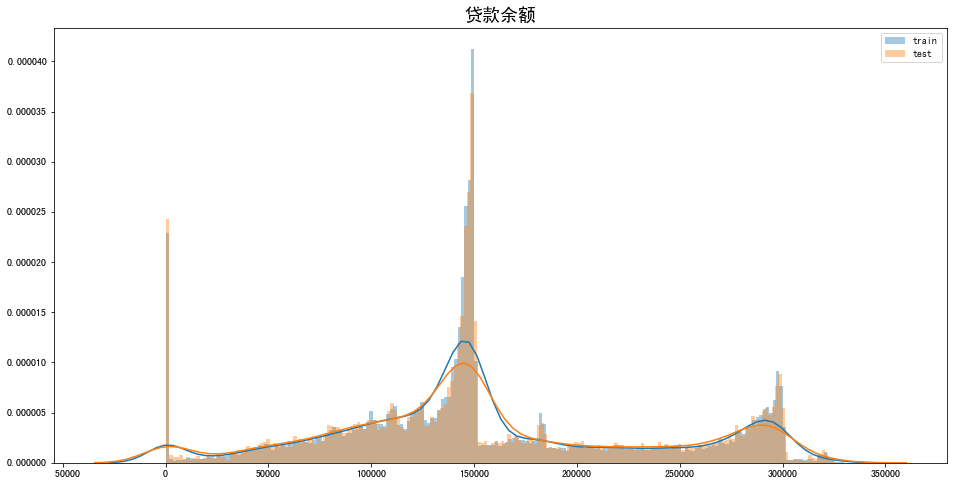

In [20]:
# sns.set_palette("bright")

fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['贷款余额']], hist=True, bins=200)
sns.distplot(test[['贷款余额']], hist=True, bins=200)
axes.set_title ("贷款余额", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show();
gc.collect();

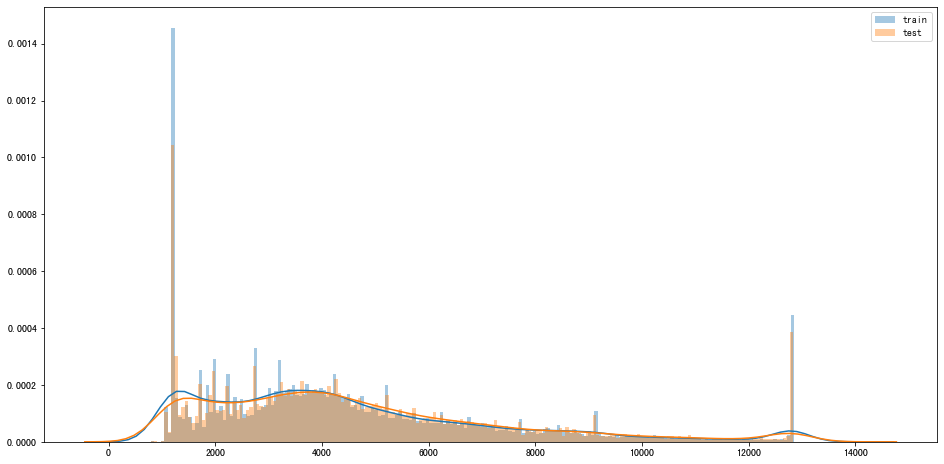

29834

In [21]:
fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['个人缴存基数']], hist=True, bins=200)
sns.distplot(test[['个人缴存基数']], hist=True, bins=200)
# axes.set_title ("个人缴存基数", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show()
gc.collect()

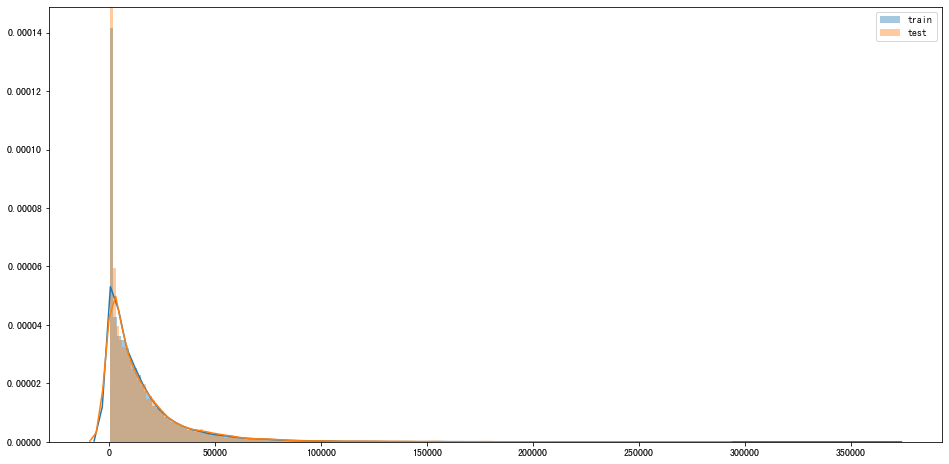

29722

In [22]:
fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['个人账户余额']], hist=True, bins=200)
sns.distplot(test[['个人账户余额']], hist=True, bins=200)
# axes.set_title ("个人账户余额", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show()
gc.collect()

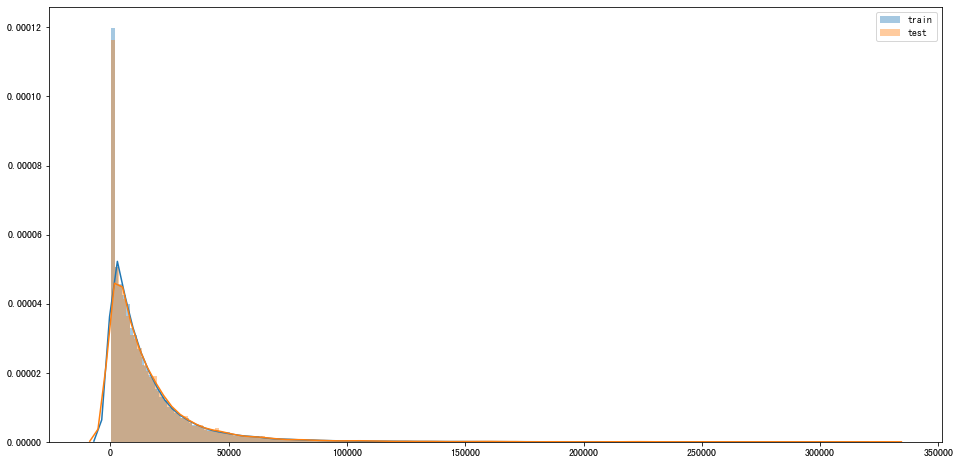

29722

In [23]:
fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['个人账户上年结转余额']], hist=True, bins=200)
sns.distplot(test[['个人账户上年结转余额']], hist=True, bins=200)
# axes.set_title ("个人账户上年结转余额", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show()
gc.collect()

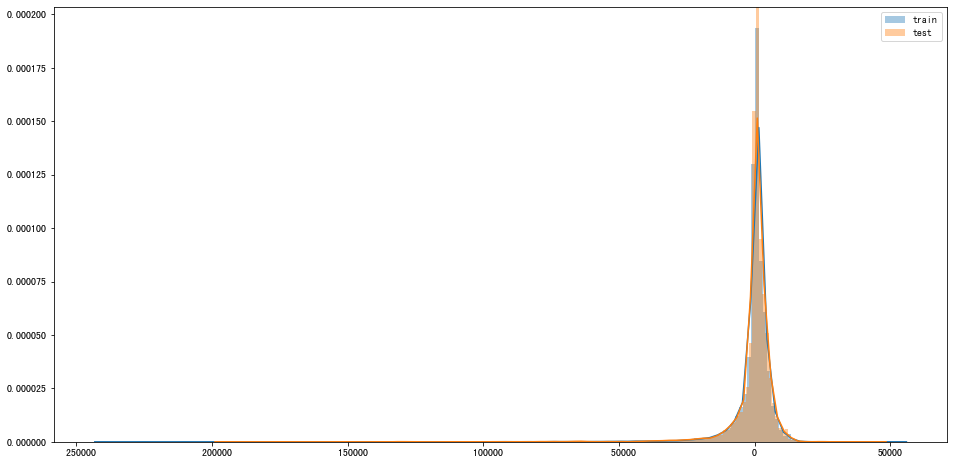

29664

In [24]:
fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['个人账户当年归集余额']], hist=True, bins=200)
sns.distplot(test[['个人账户当年归集余额']], hist=True, bins=200)
# axes.set_title ("个人账户当年归集余额", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show()
gc.collect()

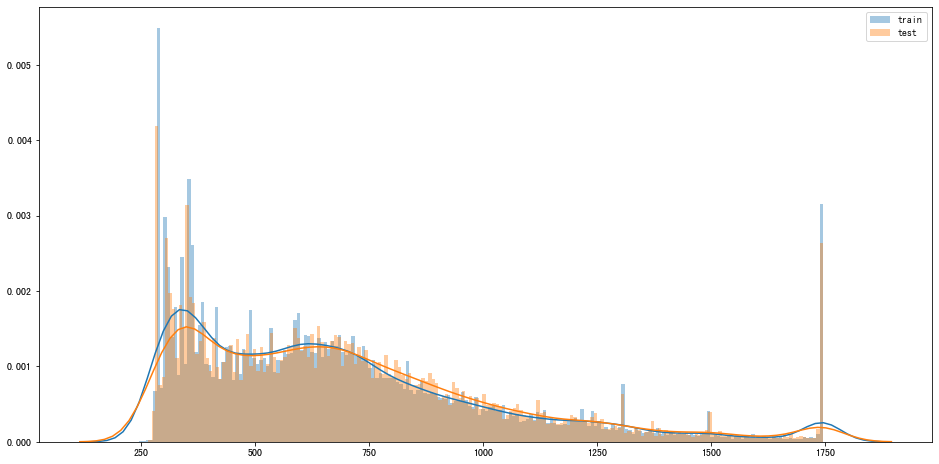

29722

In [25]:
fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['个人月缴存额']], hist=True, bins=200)
sns.distplot(test[['个人月缴存额']], hist=True, bins=200)
# axes.set_title ("个人月缴存额", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show()
gc.collect()

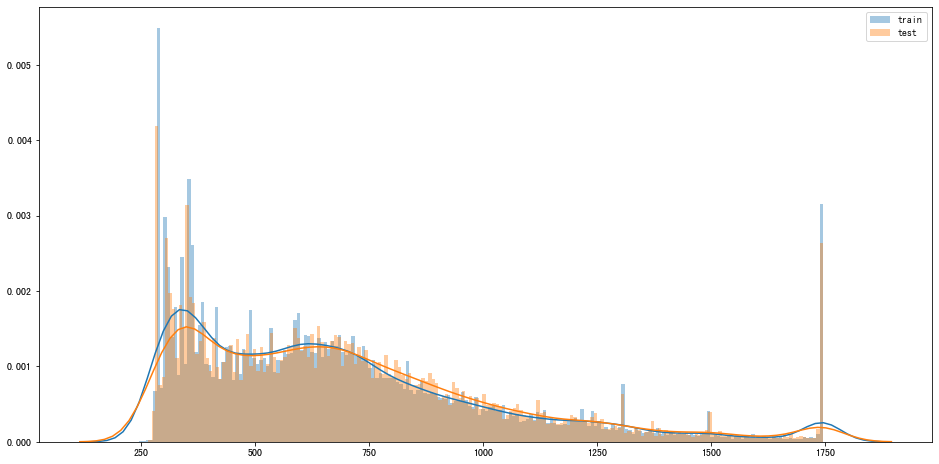

29548

In [26]:
fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['单位月缴存额']], hist=True, bins=200)
sns.distplot(test[['单位月缴存额']], hist=True, bins=200)
# axes.set_title ("单位月缴存额", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show()
gc.collect()

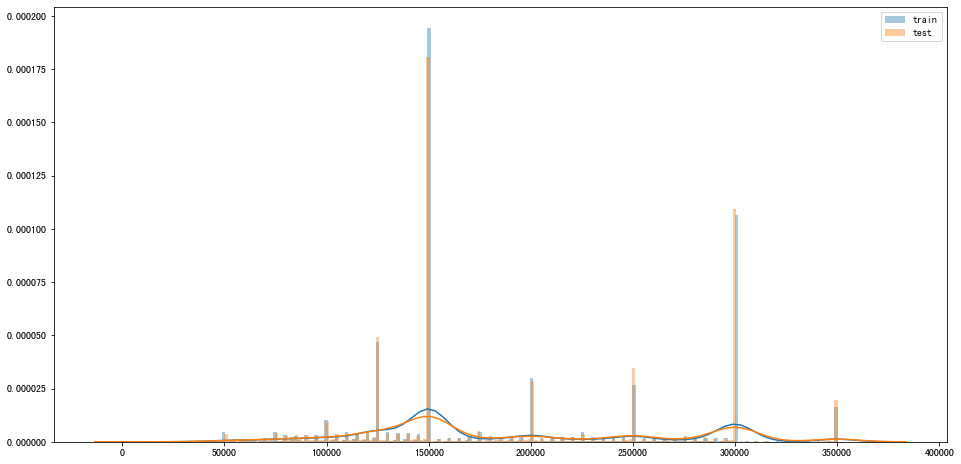

29548

In [27]:
fig, axes = plt.subplots(1,1,figsize=(16,8))

sns.distplot(train[['贷款发放额']], hist=True, bins=200)
sns.distplot(test[['贷款发放额']], hist=True, bins=200)
# axes.set_title ("贷款发放额", fontsize=18)
axes.legend(labels=['train', 'test'])
plt.show()
gc.collect()

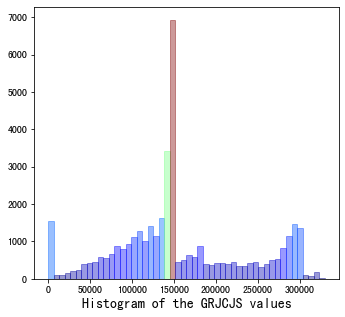

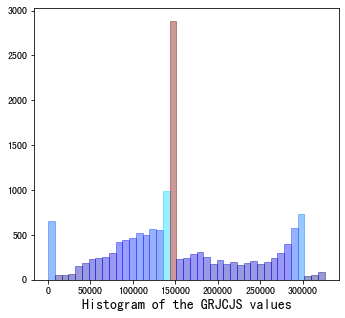

In [28]:
plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(train['贷款余额'], 
#              bins=100, 
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the GRJCJS values", size=14)
# plt.show();

plt.figure(figsize = (12,5))
plt.subplot(1, 2, 2)
ax = sns.distplot(test['贷款余额'], 
#              bins=100, 
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the GRJCJS values", size=14)
plt.show();

# del values
# gc.collect();

In [29]:
train.corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,性别,出生年月,婚姻状况,职业,职称,职务,学历,单位经济类型,单位所属行业,个人缴存基数,个人账户状态,个人账户余额,个人账户上年结转余额,个人账户当年归集余额,个人月缴存额,单位月缴存额,贷款发放额,贷款余额,贷款利率,是否逾期
性别,1,0.058,0.0054,0.0075,0.013,-0.00073,0.00073,-0.024,0.11,-0.096,-0.021,0.008,0.0068,0.00064,-0.073,-0.073,0.032,0.031,0.042,0.015
出生年月,0.058,1,-0.009,-0.0028,0.0024,0.0014,-0.0014,0.1,-0.14,-0.23,-0.037,-0.19,-0.24,-0.02,-0.26,-0.26,-0.096,0.17,-0.14,-0.13
婚姻状况,0.0054,-0.009,1,0.55,0.49,-0.85,0.85,-0.0067,-0.0037,0.01,0.00095,0.0043,0.012,0.0028,0.0072,0.0072,-0.0032,-0.0099,-0.0016,0.0046
职业,0.0075,-0.0028,0.55,1,0.87,-0.53,0.53,-0.048,-0.011,0.0097,-0.0051,0.0036,0.027,-0.0044,0.0065,0.0065,-0.0028,-0.0069,-0.014,-0.003
职称,0.013,0.0024,0.49,0.87,1,-0.41,0.41,-0.059,-0.012,0.012,-0.014,0.0052,0.032,-0.0068,0.0089,0.0089,0.0056,0.0026,-0.013,-0.019
职务,-0.00073,0.0014,-0.85,-0.53,-0.41,1,-1,-0.0072,0.002,-0.0074,-0.0007,-0.0029,-0.0088,-0.003,-0.0051,-0.0051,0.0039,0.0086,0.0049,-0.0033
学历,0.00073,-0.0014,0.85,0.53,0.41,-1,1,0.0072,-0.002,0.0074,0.0007,0.0029,0.0088,0.003,0.0051,0.0051,-0.0039,-0.0086,-0.0049,0.0033
单位经济类型,-0.024,0.1,-0.0067,-0.048,-0.059,-0.0072,0.0072,1,-0.13,-0.061,0.012,-0.05,-0.06,0.017,-0.092,-0.092,-0.0091,0.018,-0.037,0.083
单位所属行业,0.11,-0.14,-0.0037,-0.011,-0.012,0.002,-0.002,-0.13,1,-0.021,0.0033,0.036,0.024,0.0098,0.028,0.028,0.018,-0.031,0.033,0.19
个人缴存基数,-0.096,-0.23,0.01,0.0097,0.012,-0.0074,0.0074,-0.061,-0.021,1,-0.023,0.33,0.33,0.041,0.95,0.95,0.21,0.014,0.067,0.11


In [30]:
print(train['职务'].value_counts())
print(test['职务'].value_counts())

0    39994
1        6
Name: 职务, dtype: int64
0    10000
1     5000
Name: 职务, dtype: int64


In [31]:
print(train['学历'].value_counts())
print(test['学历'].value_counts())

1    39994
0        6
Name: 学历, dtype: int64
1    15000
Name: 学历, dtype: int64


(array([526., 208., 424., 509., 558., 391.,  96.,  18.,   6.,  21.]),
 array([  0. ,  40.1,  80.2, 120.3, 160.4, 200.5, 240.6, 280.7, 320.8,
        360.9, 401. ]),
 <a list of 10 Patch objects>)

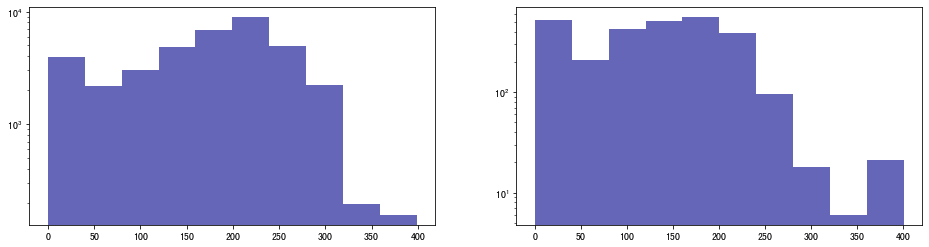

In [32]:
fig,((ax11,ax12)) = plt.subplots(1,2,figsize=(16,4))
ax11.hist(train[train['是否逾期']==0]['出生年月'], color='darkblue',alpha=.6, log=True)
ax12.hist(train[train['是否逾期']==1]['出生年月'], color='darkblue',alpha=.6, log=True)

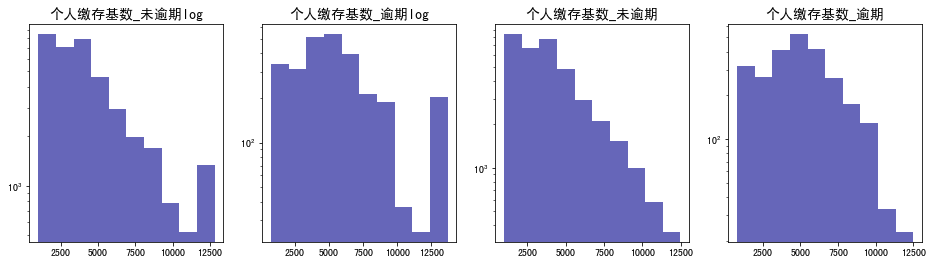

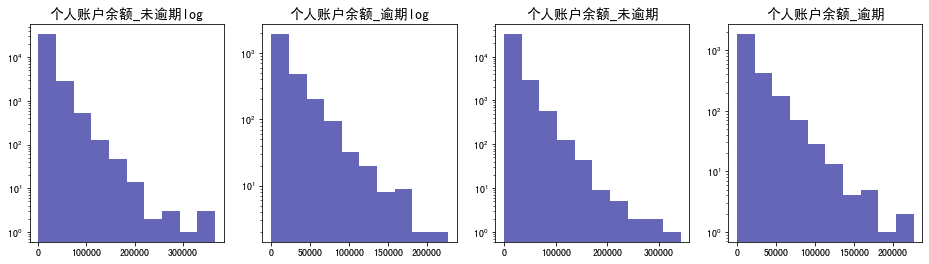

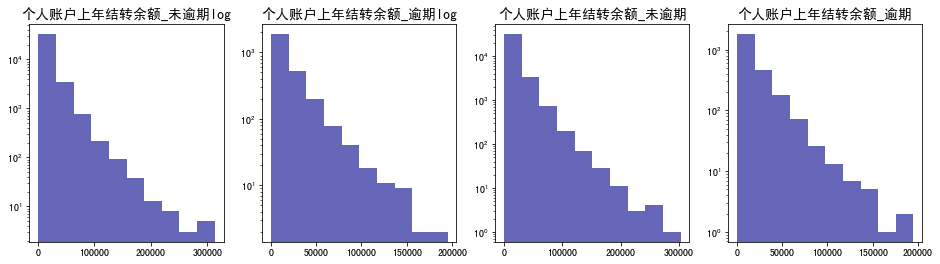

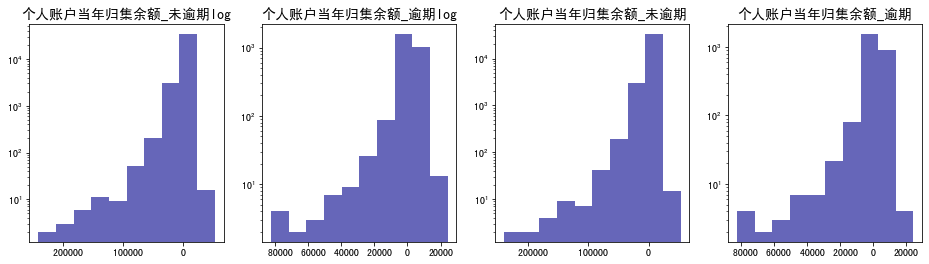

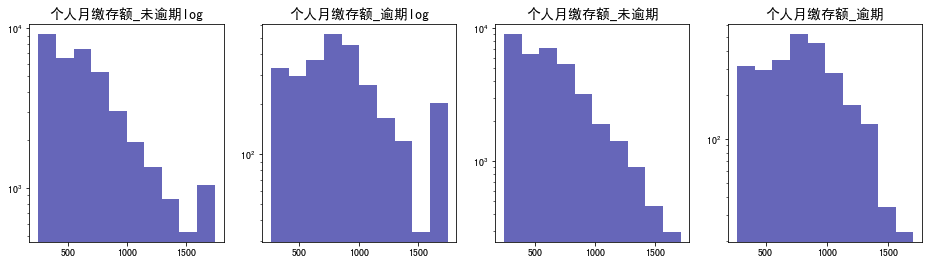

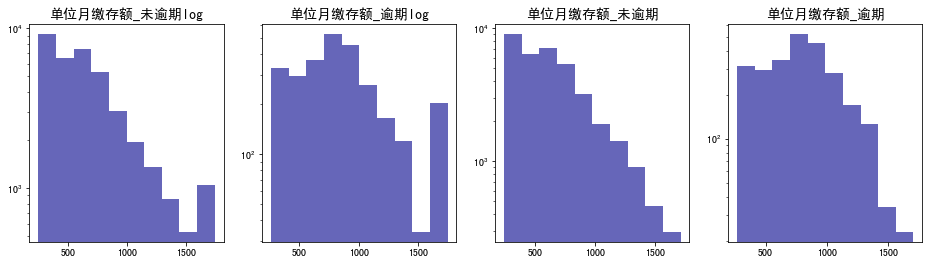

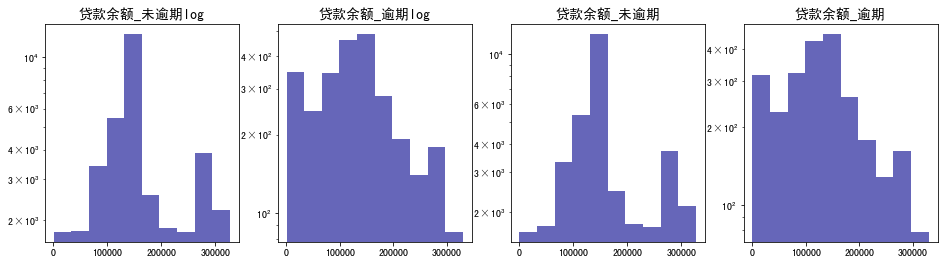

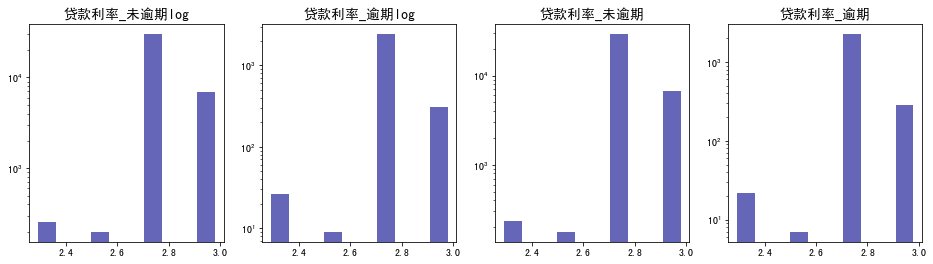

In [33]:
for col in [f for f in train.select_dtypes('float64').columns if f not in ['是否逾期', '贷款发放额']]:
    fig,((ax11,ax12,ax13,ax14)) = plt.subplots(1,4,figsize=(16,4))
    ax11.hist(train[train['是否逾期']==0][col], color='darkblue',alpha=.6, log=True)
    ax12.hist(train[train['是否逾期']==1][col], color='darkblue',alpha=.6, log=True)
    ax13.hist(train[(train['是否逾期']==0)&(train['个人缴存基数']<12500)][col], color='darkblue',alpha=.6, log=True)
    ax14.hist(train[(train['是否逾期']==1)&(train['个人缴存基数']<12500)][col], color='darkblue',alpha=.6, log=True)
    ax11.set_title(col+'_未逾期log',fontsize=14)
    ax12.set_title(col+'_逾期log',fontsize=14)
    ax13.set_title(col+'_未逾期',fontsize=14)
    ax14.set_title(col+'_逾期',fontsize=14)

In [34]:
train[train['是否逾期']==0]['个人账户状态'].value_counts()

0    37238
4        5
Name: 个人账户状态, dtype: int64

In [35]:
train[train['是否逾期']==1]['个人账户状态'].value_counts()

0    2584
1     155
3      10
4       4
2       4
Name: 个人账户状态, dtype: int64

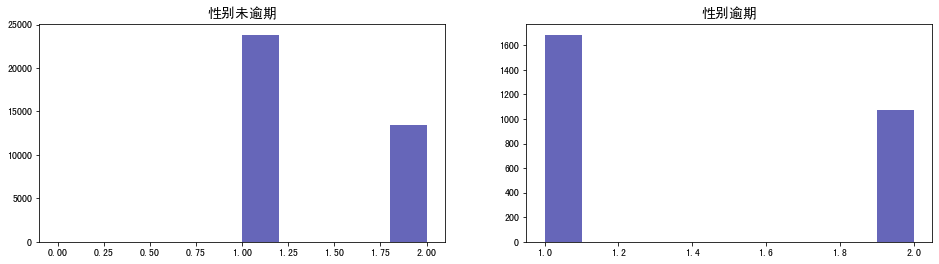

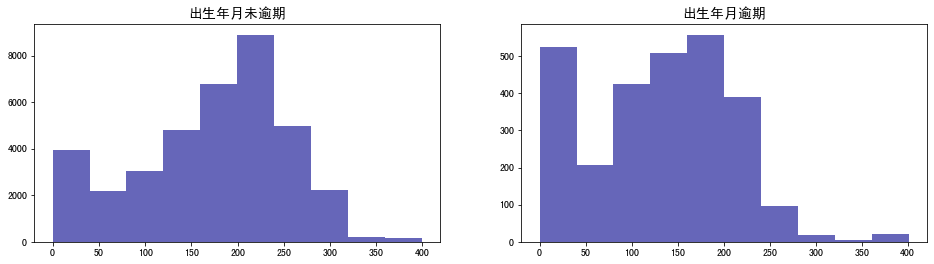

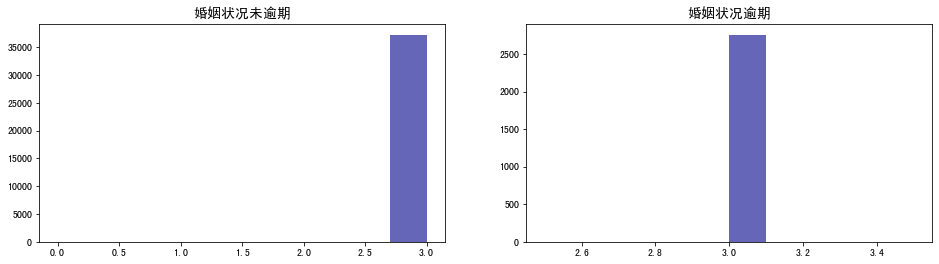

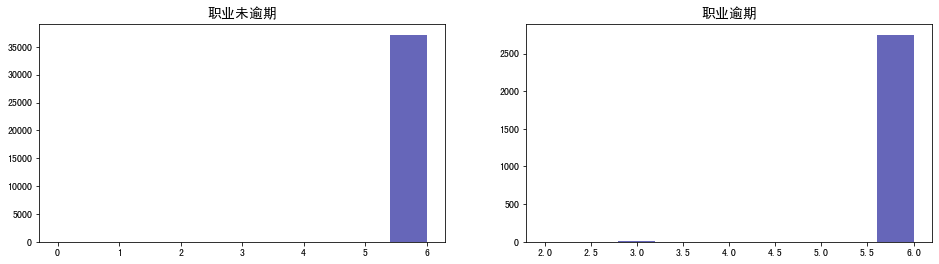

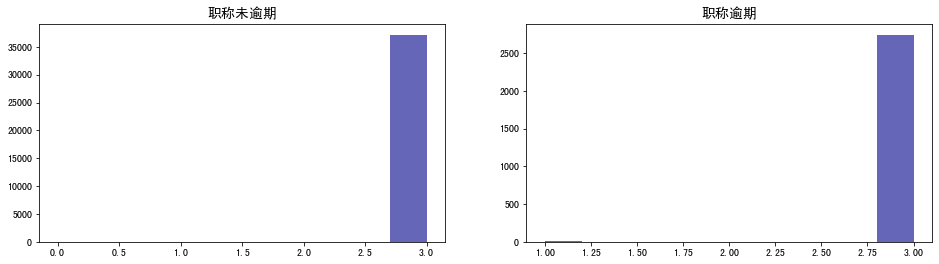

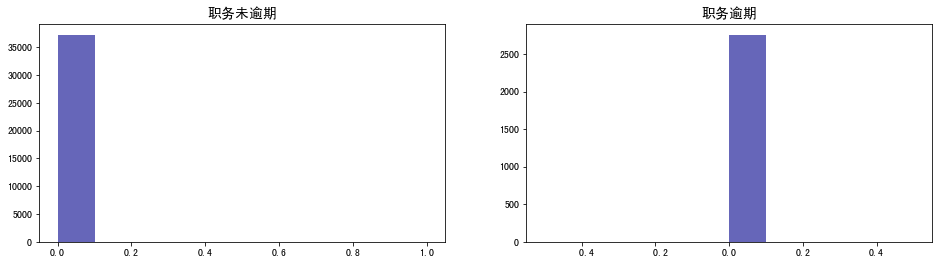

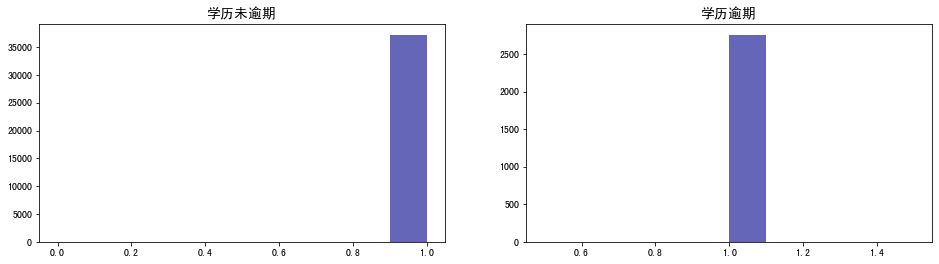

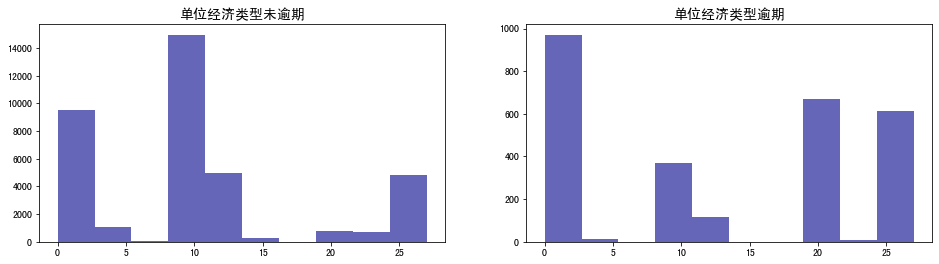

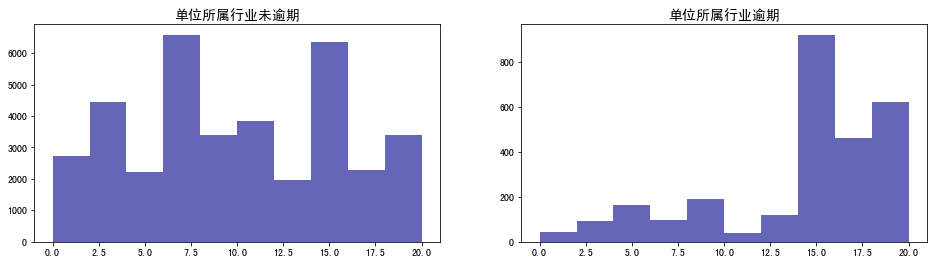

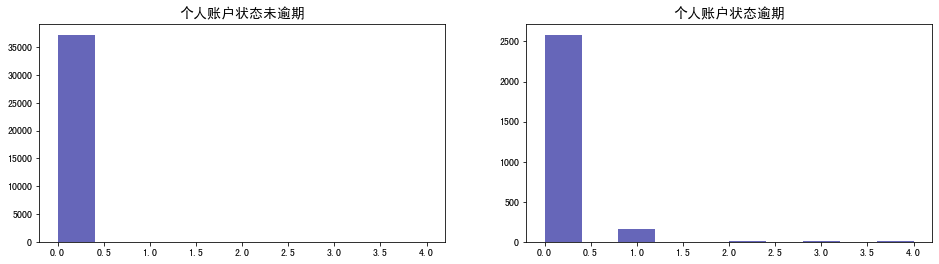

In [36]:
for col in [f for f in train.select_dtypes('int64').columns if f not in ['是否逾期', '贷款发放额']]:
    fig,((ax11,ax12)) = plt.subplots(1,2,figsize=(16,4))
    ax11.hist(train[train['是否逾期']==0][col], color='darkblue',alpha=.6)
    ax12.hist(train[train['是否逾期']==1][col], color='darkblue',alpha=.6)
    ax11.set_title(col+'未逾期',fontsize=14)
    ax12.set_title(col+'逾期',fontsize=14)

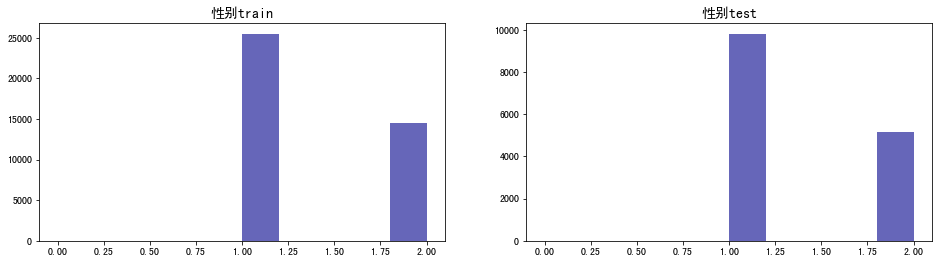

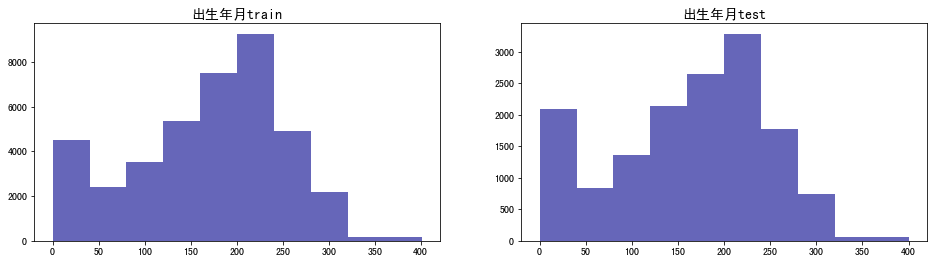

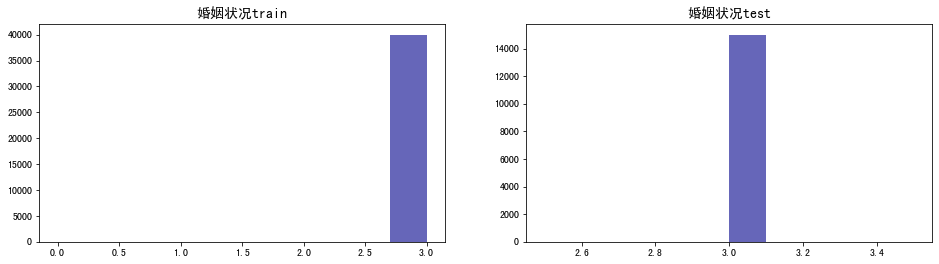

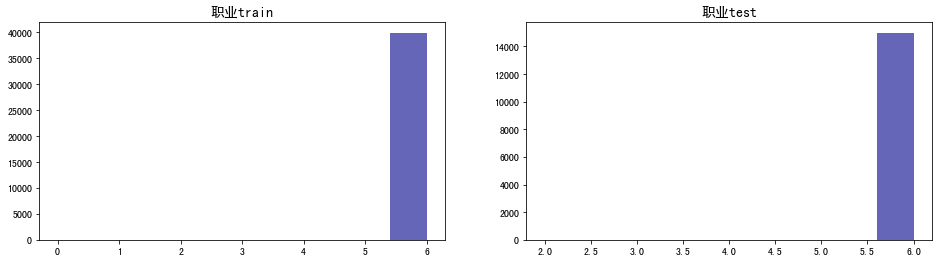

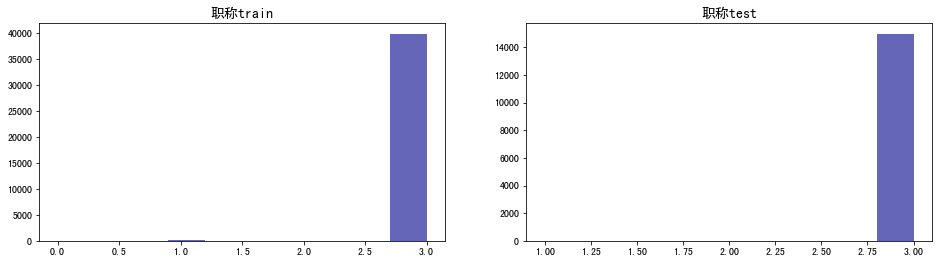

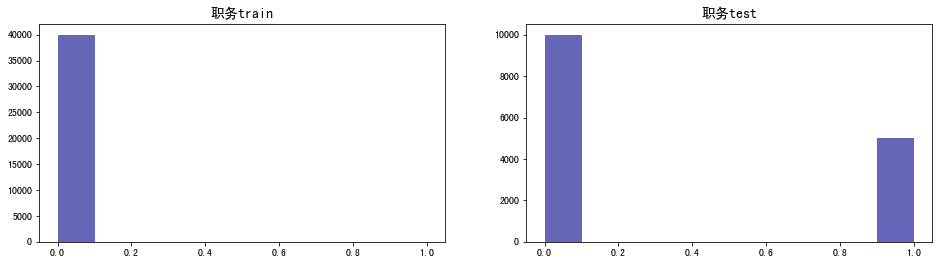

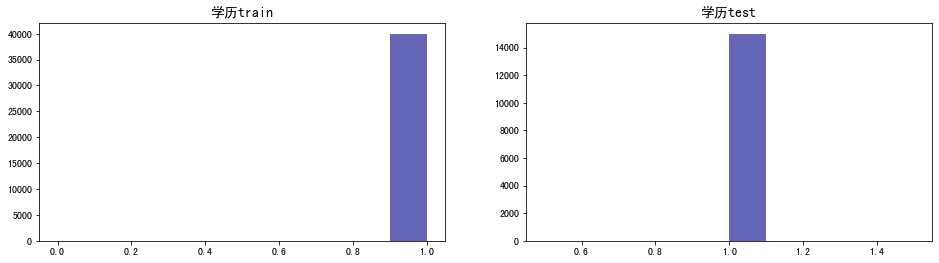

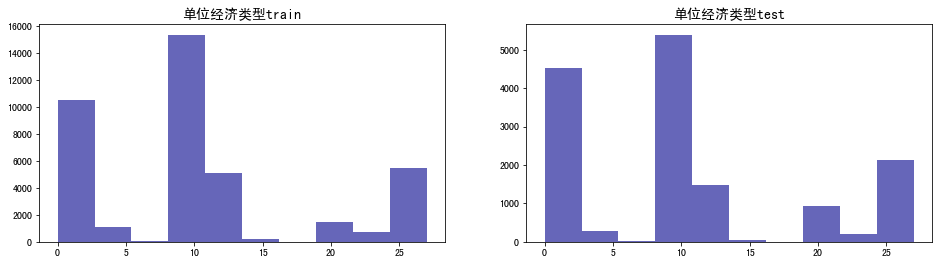

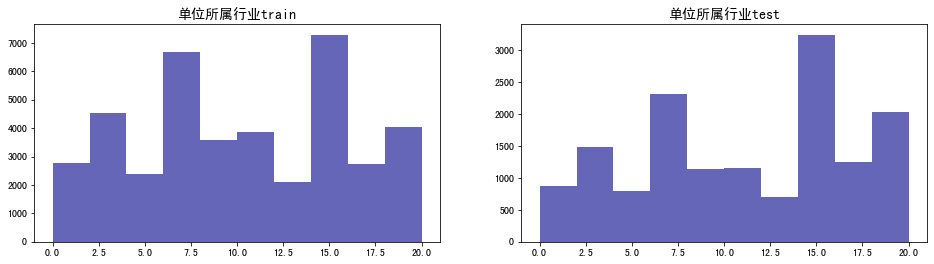

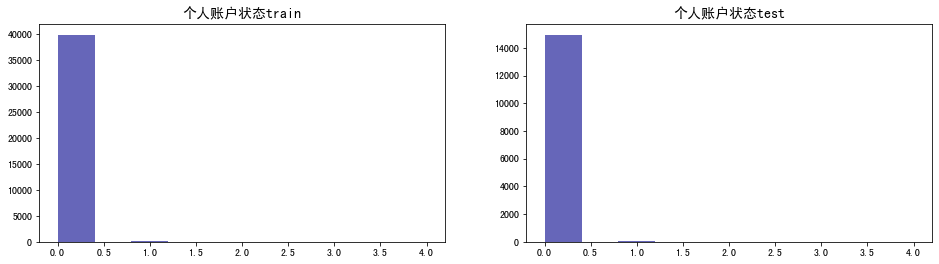

In [37]:
for col in [f for f in train.select_dtypes('int64').columns if f not in ['是否逾期', '贷款发放额']]:
    fig,((ax11,ax12)) = plt.subplots(1,2,figsize=(16,4))
    ax11.hist(train[col], color='darkblue',alpha=.6)
    ax12.hist(test[col], color='darkblue',alpha=.6)
    ax11.set_title(col+'train',fontsize=14)
    ax12.set_title(col+'test',fontsize=14)
